# Create XGBoost Model  

Given the tokenization encoding from **bge-m3** and some of the attributes from the post, predict whether the post is negative, positive, or neutral

In [3]:
pip list

Package                 Version
----------------------- -----------
appnope                 0.1.4
asttokens               3.0.0
comm                    0.2.2
debugpy                 1.8.13
decorator               5.2.1
executing               2.2.0
ipykernel               6.29.5
ipython                 9.0.2
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
jupyter_client          8.6.3
jupyter_core            5.7.2
matplotlib-inline       0.1.7
nest-asyncio            1.6.0
packaging               24.2
parso                   0.8.4
pexpect                 4.9.0
pip                     24.3.1
platformdirs            4.3.7
prompt_toolkit          3.0.50
psutil                  7.0.0
ptyprocess              0.7.0
pure_eval               0.2.3
Pygments                2.19.1
python-dateutil         2.9.0.post0
pyzmq                   26.3.0
six                     1.17.0
stack-data              0.6.3
tornado                 6.4.2
traitlets               5.14.3
wcwidth           

In [1]:
# !pip install --upgrade pip setuptools wheel
# !pip uninstall urllib3 -y

In [2]:
# conda install numpy==1.24.4 
# !pip uninstall numpy -y

In [3]:
# %%capture
# !pip install --force-reinstall transformers==4.20.1
# !pip install --force-reinstall sentence-transformers==3.4.1

# import transformers
# transformers.version
# !pip uninstall transformers -y
# !pip install --force-reinstall transformers==4.37.2

# !pip3 install -r ../requirements.txt

In [2]:
pip list

Package                 Version
----------------------- -----------
appnope                 0.1.4
asttokens               3.0.0
comm                    0.2.2
debugpy                 1.8.13
decorator               5.2.1
executing               2.2.0
ipykernel               6.29.5
ipython                 9.0.2
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
jupyter_client          8.6.3
jupyter_core            5.7.2
matplotlib-inline       0.1.7
nest-asyncio            1.6.0
packaging               24.2
parso                   0.8.4
pexpect                 4.9.0
pip                     24.3.1
platformdirs            4.3.7
prompt_toolkit          3.0.50
psutil                  7.0.0
ptyprocess              0.7.0
pure_eval               0.2.3
Pygments                2.19.1
python-dateutil         2.9.0.post0
pyzmq                   26.3.0
six                     1.17.0
stack-data              0.6.3
tornado                 6.4.2
traitlets               5.14.3
wcwidth           

In [1]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import sys 
import requests

sys.path.append('../scripts/')

ModuleNotFoundError: No module named 'sentence_transformers'

In [7]:
pd.set_option('display.max_rows', 100)

NameError: name 'pd' is not defined

In [8]:
random_state = 13

In [5]:
from access_data import authenticate_google_drive, grab_google_drive_folder_data

drive = authenticate_google_drive()
text_data = grab_google_drive_folder_data(drive=drive,filename="combined_labeled_data.csv")

Successfully loaded 'combined_labeled_data.csv' into a DataFrame!


In [6]:
%%time 

def create_embedding_dataframes(post_dataset, model, col_to_encode='combine_text'):

    dataset = post_dataset.copy().reset_index(drop=True)
    text_to_encode = post_dataset[col_to_encode]
    
    data_with_embdedding = pd.DataFrame()
    print('Started with model ' + model)
    load_model = SentenceTransformer(model, device="cpu") 
    post_embedding = load_model.encode(text_to_encode.values)
    data_with_embdedding = pd.concat([dataset, pd.DataFrame(post_embedding)], axis = 1)
    print('Done with model: ' + model)

    return data_with_embdedding
    
# "BAAI/bge-m3", bert-base-nli-mean-tokens
# model_names = ["bert-base-nli-mean-tokens"]
# model = "BAAI/bge-m3"
model = "BAAI/bge-small-en-v1.5"
# model = "bert-base-nli-mean-tokens"
embedded_df = create_embedding_dataframes(text_data, model)


Started with model BAAI/bge-small-en-v1.5
Done with model: BAAI/bge-small-en-v1.5
CPU times: user 25 s, sys: 4.66 s, total: 29.6 s
Wall time: 17.2 s


In [7]:
embedded_df.head()

,submission_id,subreddit_topic,search_query,combine_text,url,label,reviewer,0,1,2,...,374,375,376,377,378,379,380,381,382,383
0,18zezww,realtors,Zillow,Zillow premier agent vs. Realtor.com. I'm look...,https://www.reddit.com/r/realtors/comments/18z...,Neutral,chrismca,-0.006613,-0.054285,-0.035912,...,0.018380,0.012204,-0.012643,-0.011230,0.015382,0.018221,0.034884,0.028262,0.003052,0.026951
1,1g3882c,HomeNetworking,Xfinity,Xfinity wants me to install splitter so neighb...,https://www.reddit.com/r/HomeNetworking/commen...,Neutral,chrismca,-0.013227,-0.078881,0.057679,...,0.016165,-0.051144,-0.017337,-0.004718,0.007024,0.025523,-0.012889,0.033474,0.007012,0.058340
2,1iy5lng,IRS,Turbo Tax,Turbo Tax DDD. Anyone else who filed early wit...,https://www.reddit.com/r/IRS/comments/1iy5lng/...,Neutral,chrismca,-0.102254,-0.036086,-0.006344,...,0.037448,-0.019023,-0.034445,-0.010031,-0.017376,0.024768,-0.002800,0.060249,0.006012,0.004829
3,1i5ihae,Comcast_Xfinity,Xfinity,Xfinity Couldn't Care Less About its Customers...,https://www.reddit.com/r/Comcast_Xfinity/comme...,Negative,chrismca,-0.038031,-0.060860,0.030182,...,-0.004865,-0.101199,-0.002559,0.001837,-0.065044,0.015349,-0.035043,-0.007033,0.000938,0.022963
4,1j57n5j,Mortgages,Rocket Mortgage,Has anyone done a early pay off of their Rocke...,https://www.reddit.com/r/Mortgages/comments/1j...,Neutral,chrismca,-0.016353,-0.042580,-0.003446,...,0.050818,-0.036677,-0.041011,0.054549,-0.028821,-0.007817,0.045909,0.013124,-0.002656,0.038991


In [8]:
embedded_df.isna().sum()

submission_id      0
subreddit_topic    0
search_query       0
combine_text       0
url                0
                  ..
379                0
380                0
381                0
382                0
383                0
Length: 391, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report
import xgboost as xgb

In [10]:
# ================================
# Feature Prep & Split Data 
# ================================
label_mapping = {
    'Neutral': 0,
    'Negative': 1,
    'Positive': 2
}
embedded_df['label_encode'] = embedded_df['label'].map(label_mapping)

ids = ['submission_id']
tokenization_columns_numerical = list(embedded_df.columns)[7:]
categorical = ['subreddit_topic', 'search_query']
features = tokenization_columns_numerical + categorical
target = 'label_encode'

# Prevent data leakage 
if target in features: 
    features.remove(target)

X = embedded_df[features]
y = embedded_df[target]
id_df = embedded_df[ids]

# Enable Categorical 
for cat in categorical: 
    X[cat] = X[cat].astype("category") 
    embedded_df[cat] = embedded_df[cat].astype("category")

X_train, X_test, y_train, y_test, id_train, id_test  = train_test_split(X, y, id_df, test_size=0.33, random_state=random_state)


/var/folders/wp/393dmtxd2jd8sj2z2tt7jpm40000gn/T/ipykernel_1689/4046039977.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat] = X[cat].astype("category")
/var/folders/wp/393dmtxd2jd8sj2z2tt7jpm40000gn/T/ipykernel_1689/4046039977.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat] = X[cat].astype("category")


In [ ]:
import numpy as np
import pandas as pd 
import xgboost as xgb
# ================================
# Handle Class Imbalance & Create model pipeline
# ================================
from sklearn.utils.class_weight import compute_class_weight,compute_sample_weight

# Compute class weights to offset the class imbalance
y_train = np.array([0, 0, 0, 1, 1])  # Imbalance: More 0s than 1s
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# print("Class Weights:", class_weights)

# # Fit the model with sample weights
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

model = xgb.XGBClassifier(
    objective='multi:softmax',       
    num_class=3,                      
    eval_metric='mlogloss',           
    random_state=13,
    enable_categorical=True
)

model.fit(X_train, y_train)


In [8]:
X_train.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1023',
       'subredit_topic', 'search_query'],
      dtype='object', length=1025)

Training Dataset:
 |    |   label_encode |
|---:|---------------:|
|  0 |             68 |
|  1 |             19 |
|  2 |              1 |
Testing Dataset:
 |    |   label_encode |
|---:|---------------:|
|  0 |             34 |
|  1 |              8 |
|  2 |              2 |


/Users/andreeaserban/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/andreeaserban/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/andreeaserban/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

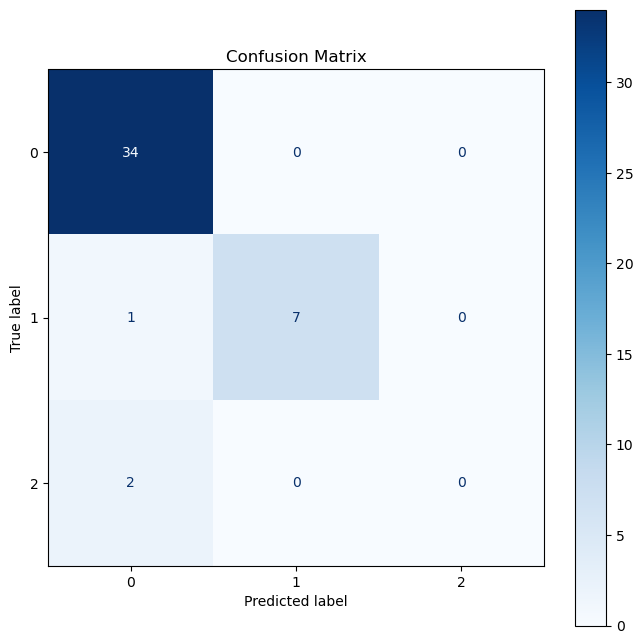

In [9]:
# ================================
# Evaluate the Model 
# ================================
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Training Dataset:\n", y_train.value_counts().to_markdown())
print("Testing Dataset:\n", y_test.value_counts().to_markdown())

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])

fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Get outputs

In [10]:
final_data = pd.DataFrame() 
final_data['submission_id'] = id_test['submission_id']
final_data[['subredit_topic', 'search_query']] = X_test[['subredit_topic', 'search_query']]
final_data[['neutral', 'negative', 'positive']] = model.predict_proba(X_test)
final_data['class_pred']  = model.predict(X_test)



In [11]:
final_data = final_data.rename(columns={'subredit_topic': 'subreddit_topic'})
final_data.head() 


,submission_id,subreddit_topic,search_query,neutral,negative,positive,class_pred
64,1iied6m,IRS,Turbo Tax,0.977134,0.020386,0.002480,0
97,1fury2p,Banking,Wells Fargo,0.429232,0.548512,0.022256,1
110,1gum4oc,FirstTimeHomeBuyer,Rocket Mortgage,0.997818,0.000892,0.001290,0
70,191leob,FirstTimeHomeBuyer,Rocket Mortgage,0.927970,0.051890,0.020140,0
72,19bd4r0,FirstTimeHomeBuyer,Rocket Mortgage,0.996936,0.001099,0.001965,0


In [ ]:
from access_data import authenticate_google_drive, save_google_drive_data

drive = authenticate_google_drive()
save_google_drive_data(drive=drive, 
                       dataframe =final_data, 
                       filename="xgboost_bge_test_predictions.csv")

## Score all 5,000 posts

In [24]:
final_data.columns

Index(['submission_id', 'subreddit_topic', 'search_query', 'neutral',
       'negative', 'positive', 'class_pred'],
      dtype='object')

In [25]:
all_scored = data.copy(deep=True)

all_scored['class_pred'] = model.predict(data[features])
all_scored[['neutral', 'negative', 'positive']] = model.predict_proba(data[features])
all_scored['class_pred']  = model.predict(data[features])

all_scored.rename(columns={'subredit_topic': 'subreddit_topic'}, inplace=True)
columns = ['submission_id', 'subreddit_topic', 'search_query', 'neutral',
       'negative', 'positive', 'class_pred']
output_score = all_scored[columns]

In [28]:

drive = authenticate_google_drive()
save_google_drive_data(drive=drive, 
                       dataframe =output_score, 
                       filename="xgboost_bge_all_predictions.csv")

File 'xgboost_bge_all_predictions.csv' uploaded successfully to folder 1Ktcv4eaR7kH0teyGuLph4LSYWxI1qkIS!


,score
774,3.708961
391,3.121854
301,2.990773
173,2.530428
460,2.484478


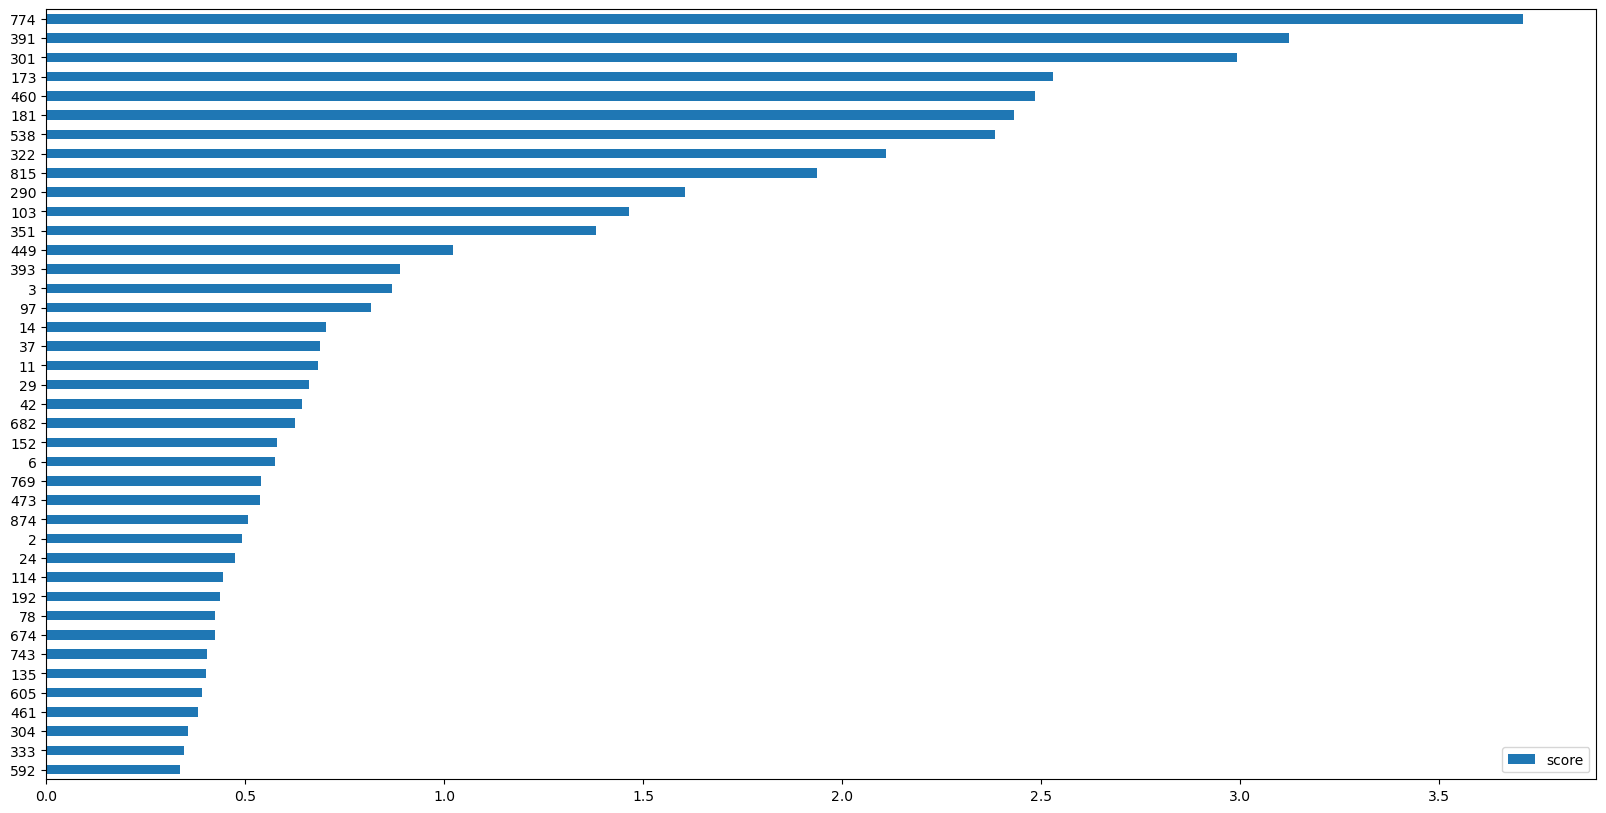

In [13]:
# ================================
# Feature Importance
# ================================

# --- 1. Extract raw feature importance ---
booster = model.get_booster()
feature_important = booster.get_score(importance_type='gain') 

keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").sort_values("score", ascending=True).plot(kind='barh', figsize=(20, 10))
data.head()

## Analyze the features 

In [14]:
# import numpy as np
# import shap 

# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_test)

# # Get mean absolute SHAP values per feature
# shap_combined = np.sum(np.abs(shap_values), axis=0)  # Shape: (num_samples, num_features)

# # Get mean absolute SHAP values per feature
# mean_shap_values = shap_combined.mean(0)

# # Select top 20 features
# top_n = 20
# top_features = np.argsort(mean_shap_values)[-top_n:]

# # Select top 20 features
# top_n = 20
# top_features = np.argsort(mean_shap_values)[-top_n:]

# # Filter data
# X_top = X_test.iloc[:, top_features]

# # # Plot only top features
# shap.summary_plot(shap_values[:, top_features], X_top)
